## Домашняя работа "Оценка точности модели, переобучение, регуляризация"

Посчитать tpr и fpr в ноутбуке к лекции. 
Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Построить график Precision - Recall на этих же данных.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('C:\\Users\\2-hom\\Documents\\Data_analysis\\Машинное обучение\\Занятие_4\\affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Формируем набор признаков и целевую переменную

In [6]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [7]:
Y = data['affair']

In [8]:
model = LogisticRegression()
model_tree = DecisionTreeClassifier()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [10]:
model.fit(X_train, Y_train)

LogisticRegression()

In [11]:
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

Получаем прогнозные значения модели (переменная predictions)

In [12]:
predictions = model.predict_proba(X_test)

In [13]:
predictions[:2]

array([[0.37442488, 0.62557512],
       [0.92523133, 0.07476867]])

In [14]:
model.score(X_train, Y_train)

0.7235188509874326

In [15]:
model.score(X_test, Y_test)

0.7319371727748691

In [16]:
model_tree.score(X_train, Y_train)

0.9497307001795332

In [17]:
model_tree.score(X_test, Y_test)

0.6523560209424084

### Оценка качества модели

Считаем accuracy последней модели

In [18]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [19]:
pred = model.predict(X_test)

In [20]:
tp, fp, fn, tn

(226, 131, 381, 1172)

In [21]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7319371727748691

In [22]:
precision = tp / (tp + fp)
precision

0.6330532212885154

In [23]:
recall = tp / (tp + fn)
recall

0.3723228995057661

In [24]:
from sklearn.metrics import recall_score, precision_score

In [25]:
recall_score(Y_test, pred)

0.3723228995057661

In [26]:
precision_score(Y_test, pred)

0.6330532212885154

### ROC

In [27]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [28]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [29]:
for line in zip( fpr[:10], tpr[:10], thres[:10] ):
    print( line )

(0.0, 0.0, 1.9292091238626423)
(0.0, 0.0016474464579901153, 0.9292091238626423)
(0.0, 0.008237232289950576, 0.8999886267837209)
(0.0007674597083653108, 0.008237232289950576, 0.897730467081866)
(0.0007674597083653108, 0.019769357495881382, 0.8650840111607958)
(0.0030698388334612432, 0.019769357495881382, 0.8547129979934648)
(0.0030698388334612432, 0.023064250411861616, 0.8544826949171787)
(0.003837298541826554, 0.023064250411861616, 0.8521926825281196)
(0.003837298541826554, 0.03130148270181219, 0.8338303559136997)
(0.004604758250191865, 0.03130148270181219, 0.8336073259069952)


In [30]:
import  matplotlib.pyplot as plt

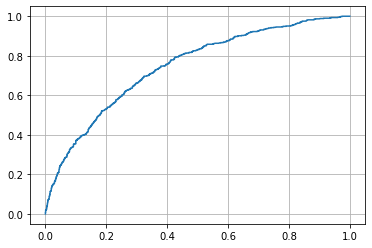

In [31]:
plt.plot( fpr, tpr )
plt.grid()

In [32]:
from sklearn import metrics

In [33]:
print(f'Площадь: {metrics.auc(fpr, tpr)}')

Площадь: 0.7451629176618145


посчитаем ROC-кривую руками

In [34]:
import numpy as np

In [71]:
tpr = []
fpr = []
for threshold in np.arange(0, 1, 0.001):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    y_pred = model.predict_proba( X_test )
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0
        
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr.append(tp/(tp+fn))
    fpr.append(fp/(fp+tn))

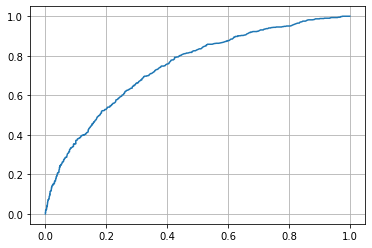

In [72]:
plt.plot(fpr, tpr)
plt.grid()

In [73]:
print(f'Площадь: {metrics.auc(fpr, tpr)}')

Площадь: 0.7452134916129424


Посчитаем площадь под ROC-кривой 

In [38]:
from sklearn.metrics import roc_curve

In [39]:
from sklearn.metrics import roc_auc_score

In [40]:
roc_auc_score( Y_test, predictions[:, 1] )

0.7451629176618145

In [41]:
from sklearn.metrics import auc

In [42]:
auc( fpr, tpr )

0.737595790224308

 ### График precision-recall

In [44]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [110]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [111]:
pr.shape, thres.shape

((1667,), (1666,))

In [112]:
# посмотрим что получилось
for line in zip( pr[-10:], re[-10:], thres[-10:] ):
    print( line )

(0.8888888888888888, 0.013179571663920923, 0.8684985540965674)
(0.875, 0.011532125205930808, 0.8709303705394771)
(0.8571428571428571, 0.009884678747940691, 0.878680308678959)
(0.8333333333333334, 0.008237232289950576, 0.8833585519613781)
(1.0, 0.008237232289950576, 0.897730467081866)
(1.0, 0.006589785831960461, 0.8999886267837209)
(1.0, 0.004942339373970346, 0.9015483745602737)
(1.0, 0.0032948929159802307, 0.9025239882262905)
(1.0, 0.0016474464579901153, 0.9029393353479469)
(1.0, 0.0, 0.9292091238626423)


(0.0, 1.0)

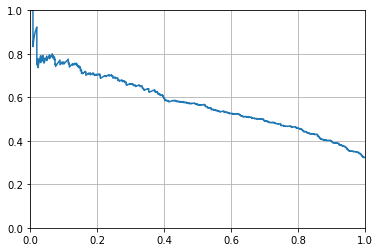

In [113]:
plt.plot(re, pr)
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)

In [114]:
print(f'Площадь: {metrics.auc(re, pr)}')

Площадь: 0.5754162307561571


In [49]:
from sklearn.metrics import average_precision_score

In [120]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5761329928884336

In [127]:
pr = []
re = []
for threshold in np.arange(0, 1, 0.001):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    y_pred = model.predict_proba( X_test )
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0
        
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    try:
        pr.append(tp/(tp+fp))
        re.append(tp/(tp+fn))
    except ZeroDivisionError:
        pass

(0.0, 1.0)

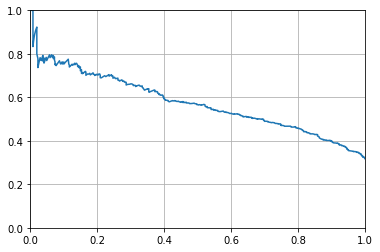

In [128]:
plt.plot(re, pr)
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)

In [129]:
print(f'Площадь: {metrics.auc(re, pr)}')

Площадь: 0.573859704599509
